In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Importation des valeurs

In [2]:
alpha = 0.15
b = 1
sigma = 0.2
T = 1
r = 0.05
K = 4
k = 20
dt = 1/20
S_0 = 5 #le fixer à 1 si on veut obtenir les cheveux 
nb_samples = 100

# Test du CIR 

In [3]:
import CIR

In [4]:
S = CIR.CIR(alpha, b, sigma, T, k, S_0)
S1 = CIR.CIR_new(alpha, b, sigma, T/k, T, S_0)

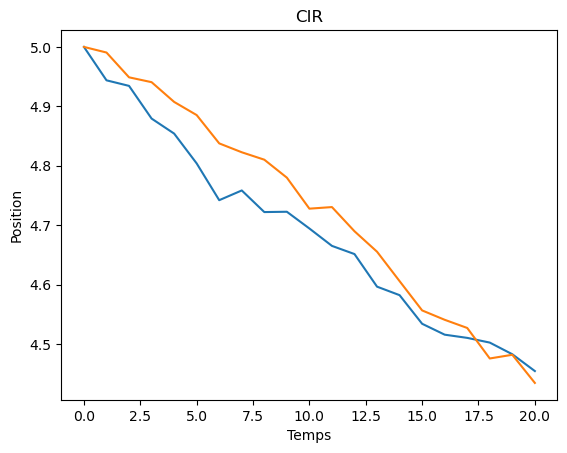

In [8]:
plt.plot(S)
plt.plot(S1)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR')
plt.show()

In [33]:
nb_samples = 100

In [7]:
M = CIR.multiCIR(alpha, b, sigma, T, k, S_0, nb_samples)

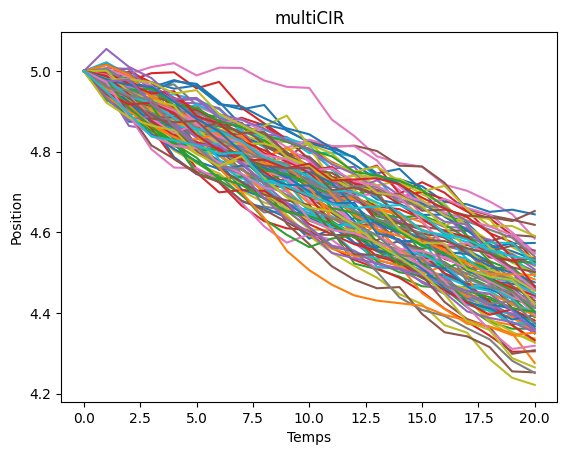

In [8]:
for i in range(nb_samples):
    plt.plot(M[i])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR')
plt.show()

# Monte Carlo Ordinaire

In [9]:
import ordinaryMC

In [10]:
ordinaryMC.pv_calc(M[3],r, T)

array([4.75614712, 4.71957851, 4.72149418, 4.66096443, 4.59728074,
       4.52608841, 4.49354523, 4.43874137, 4.40222841, 4.38526463,
       4.38104683, 4.33978128, 4.31101694, 4.2910042 , 4.26856498,
       4.23574835, 4.1957816 , 4.16504935, 4.13235378, 4.09419452,
       4.09514785])

In [11]:
OMC = ordinaryMC.ordinary_mc_sim(nb_samples, k, S_0, T, r, sigma, K, alpha, b)

In [12]:
np.mean(OMC)

0.6836771147482481

In [13]:
ordinaryMC.sim_iterator(1000, k, S_0, T, r, sigma, K, alpha, b)

(array([0.68197958, 0.67289291, 0.67846731, 0.6765276 , 0.67800522,
        0.66990051, 0.67676194, 0.68255164, 0.67721586, 0.67655242,
        0.67992928, 0.67953737, 0.68384716, 0.67385228, 0.67756435,
        0.68541193, 0.67532974, 0.67748227, 0.68511391, 0.6777156 ,
        0.67431695, 0.6764799 , 0.67716861, 0.67778101, 0.68052216,
        0.68203109, 0.68073843, 0.67467841, 0.6840809 , 0.6720028 ,
        0.67976812, 0.68332401, 0.67811291, 0.6751226 , 0.6735403 ,
        0.67975869, 0.68075272, 0.67431785, 0.67735076, 0.67674573,
        0.67794607, 0.6783379 , 0.68169116, 0.67815999, 0.67984505,
        0.67419602, 0.68055897, 0.67444835, 0.67903638, 0.68061902,
        0.67430356, 0.68157279, 0.67706176, 0.68242974, 0.67941614,
        0.67987355, 0.6815399 , 0.67850629, 0.6745442 , 0.67897228,
        0.68105757, 0.67959092, 0.67808709, 0.67609867, 0.68055989,
        0.67893745, 0.67835714, 0.67513543, 0.68081081, 0.68047925,
        0.68155212, 0.67654395, 0.68018462, 0.67

# Comparaison Monte Carlo

In [14]:
max_sample = 1000

In [15]:
ordinaryMC_price_esitmates, ordinaryMC_CIs = ordinaryMC.sim_iterator(max_sample, k, S_0, T, r, sigma, K, alpha, b)



Price estimated at largest sample size with ordinary MC: 0.6766485940666651
CI length at largest sample size with ordinary MC: 0.006414421736482101


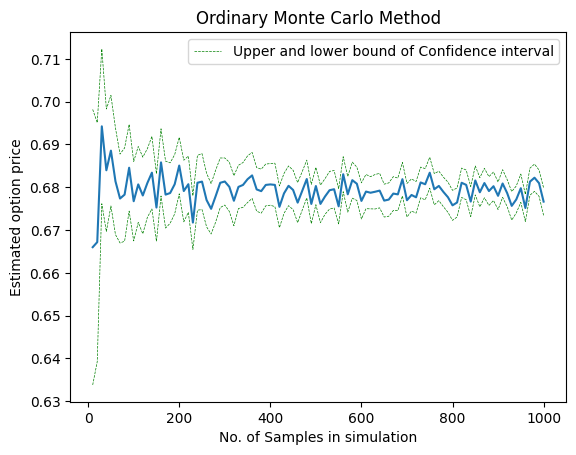

In [16]:
print("Price estimated at largest sample size with ordinary MC:", str(ordinaryMC_price_esitmates[-1]))
print("CI length at largest sample size with ordinary MC:", str(ordinaryMC_CIs[-1,1] - ordinaryMC_CIs[-1,0]))

#Ploting ordinary Monte Carlo method
x_axis1 = range(10, max_sample + 1, 10)
plt.plot(x_axis1, ordinaryMC_price_esitmates)
plt.plot(x_axis1, ordinaryMC_CIs[1:, 0], 'g--', lw=0.5, label='Upper and lower bound of Confidence interval')
plt.plot(x_axis1, ordinaryMC_CIs[1:, 1], 'g--', lw=0.5)
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("Ordinary Monte Carlo Method")
plt.legend()
plt.show()


In [17]:
import comparaison

In [18]:
CI = ordinaryMC_CIs
tol = 0.005
mc_threshold = comparaison.threshold_finder(CI, tol)
#sample_convergent = mc_threshold * 10
sample_convergent = 1500



In [19]:
CPU_sample = comparaison.CPU(sample_convergent,k, S_0, T, r, sigma, K, alpha, b)
CPU_sample


0.4520438500039745

In [20]:
mean_pv_payoffs_cvg = 0.6789593446701989

In [21]:

mse_comparaison = comparaison.mse_comparaison(100, k, S_0, T, r, sigma, K, alpha, b, 0.6789593446701989)

10
20
30
40
50
60
70
80
90
100


In [22]:
mse_comparaison
# Je ne comprends pas pourquoi je trouve ce résultat, je ne suis pas censé obtenir ça

[array([0.00337534, 0.00168246, 0.00159012, 0.00269638, 0.00272247,
        0.00276572, 0.00258261, 0.00317094, 0.00309303, 0.00336315]),
 0.0015901172152891808,
 2]

# Quasi Monte Carlo

# tests Sobol generator

In [23]:
nb_samples = 100

In [24]:
sobol = CIR.sobol_generator(nb_samples, k)
print(sobol, len(sobol), len(sobol[1,]))

[[0.5     0.75    0.25    ... 0.84375 0.34375 0.46875]
 [0.5     0.25    0.75    ... 0.21875 0.71875 0.09375]
 [0.5     0.75    0.25    ... 0.09375 0.59375 0.46875]
 ...
 [0.75    0.25    0.875   ... 0.53125 0.15625 0.65625]
 [0.75    0.25    0.375   ... 0.09375 0.21875 0.71875]
 [0.75    0.25    0.125   ... 0.78125 0.65625 0.15625]] 117 20


# tests CIR_QMC

In [25]:
M = CIR.multiCIR_QMC(alpha, b, sigma, T, k, S_0, nb_samples)

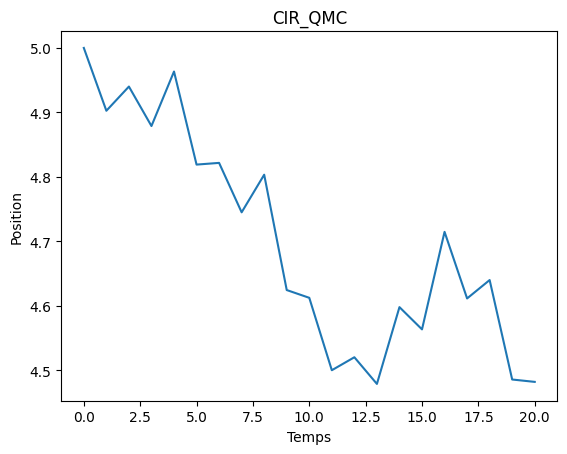

In [26]:
plt.plot(M[1])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR_QMC')
plt.show()

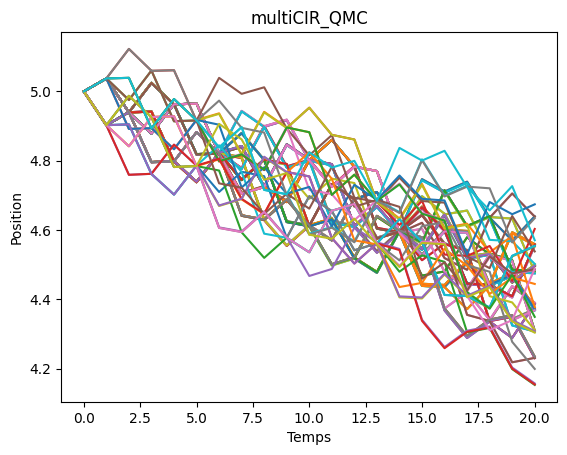

In [27]:
for i in range(nb_samples):
    plt.plot(M[i])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR_QMC')
plt.show()

# Quasi Monte Carlos

In [28]:
import ordinaryMC
import QMC

In [29]:
ordinaryMC.pv_calc(M[3],r, T)

array([4.75614712, 4.66345079, 4.69914028, 4.56226408, 4.56486702,
       4.50807057, 4.58792692, 4.60631592, 4.49585464, 4.61115062,
       4.56896722, 4.55650063, 4.38662669, 4.44190474, 4.37079301,
       4.3235163 , 4.41775917, 4.2991677 , 4.31043676, 4.23279869,
       4.27786066])

In [30]:
OMC_QMC = QMC.QMC_mc_sim(nb_samples, k, S_0, T, r, sigma, K, alpha, b)
np.mean(OMC_QMC)

0.6729958803021122

In [31]:
QMC.sim_iterator_QMC(1000, k, S_0, T, r, sigma, K, alpha, b)

(array([0.67030405, 0.66890891, 0.67289144, 0.67368627, 0.67307766,
        0.67222133, 0.67397267, 0.67343756, 0.67302825, 0.67299588,
        0.67232377, 0.67187278, 0.67152841, 0.67126818, 0.67215052,
        0.67281187, 0.67259377, 0.67073935, 0.67169282, 0.67153946,
        0.67227589, 0.67190686, 0.67178969, 0.67184999, 0.67205816,
        0.67217644, 0.67262645, 0.67164796, 0.67172295, 0.67181705,
        0.67182892, 0.67229061, 0.6728063 , 0.67348223, 0.67445719,
        0.67504915, 0.67634998, 0.67519357, 0.67572613, 0.6758411 ,
        0.67625629, 0.67650668, 0.67647068, 0.6763089 , 0.67627988,
        0.67621747, 0.67684416, 0.67628533, 0.67630456, 0.67596895,
        0.67577944, 0.67526663, 0.6755823 , 0.67539858, 0.67540742,
        0.67461142, 0.67503888, 0.67527696, 0.67473238, 0.67455601,
        0.67449193, 0.67466979, 0.67458252, 0.67376248, 0.67401107,
        0.67360358, 0.67293898, 0.67269142, 0.67246486, 0.67160056,
        0.67168216, 0.67152864, 0.67133645, 0.67

# Comparaison QMC

In [32]:
max_sample = 1000


sobol_price_esitmates, sobol_CIs = QMC.sim_iterator_QMC(max_sample, k, S_0, T, r, sigma, K, alpha, b)

In [33]:
print("Price estimated at largest sample size with Sobol sequence:", str(sobol_price_esitmates[-1]))
print("CI length at largest sample size with Sobol sequence:", str(sobol_CIs[-1,1] - sobol_CIs[-1,0]))


Price estimated at largest sample size with Sobol sequence: 0.672063980448986
CI length at largest sample size with Sobol sequence: 0.009965255969321296


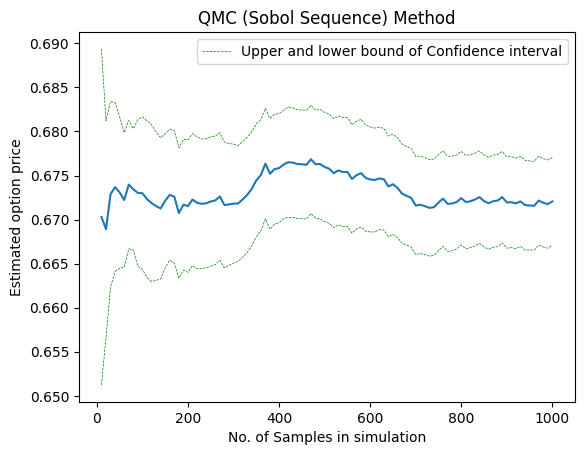

In [34]:
#Ploting quasi-Monte Carlo method using Sobol sequence

plt.plot(x_axis1, sobol_price_esitmates)
plt.plot(x_axis1, sobol_CIs[1:, 0], 'g--', lw=0.5, label='Upper and lower bound of Confidence interval')
plt.plot(x_axis1, sobol_CIs[1:, 1], 'g--', lw=0.5)
plt.xlabel("No. of Samples in simulation")
plt.ylabel("Estimated option price")
plt.title("QMC (Sobol Sequence) Method")
plt.legend()
plt.show()

In [35]:
tol = 0.01
sobol_threshold = comparaison.threshold_finder(sobol_CIs, tol)

99


In [36]:
sample_convergent_QMC = sobol_threshold * 10

In [37]:
CPU_sample_QMC = comparaison.CPU(sample_convergent_QMC,k, S_0, T, r, sigma, K, alpha, b)
CPU_sample_QMC

0.10870905000774655

In [38]:
mse_comparaison = comparaison.mse_comparaison(100, k, S_0, T, r, sigma, K, alpha, b, 0.6789593446701989)

10
20
30
40
50
60
70
80
90
100


# tests Multi Level CIR

In [3]:
pip install chaospy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import CIR

In [6]:
L = 5

In [7]:
S = CIR.level_CIR(alpha, b, sigma, L, T, S_0)

In [8]:
S

(array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 array([5.        , 4.98554223, 4.98008483, 4.98313041, 4.95860946,
        4.92040272, 4.89377591, 4.86386636, 4.83828826, 4.81721954,
        4.78850722, 4.75295305, 4.7390408 , 4.72588816, 4.70760075,
        4.68405328, 4.66575521, 4.63697818, 4.60866094, 4.61203315,
        4.59729617, 4.59455355, 4.57607571, 4.56786809, 4.53089251,
        4.5330351 , 4.52728162, 4.49842118, 4.48234802, 4.48367529,
        4.45862654, 4.45584038, 4.47713446]))

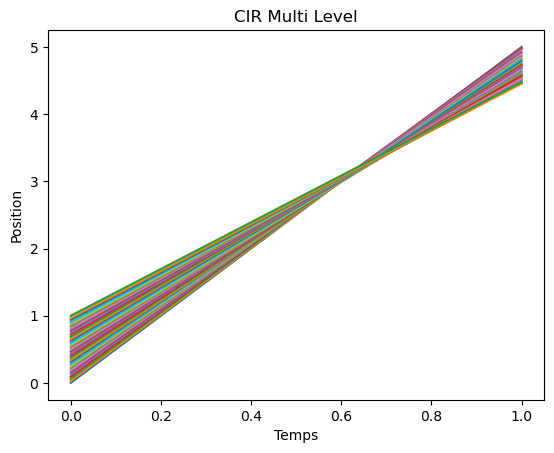

In [9]:
plt.plot(S)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('CIR Multi Level')
plt.show()

In [10]:
nb_samples = 100 

In [11]:
M = CIR.multiCIR_ML_principle(alpha, b, sigma, L, T, S_0)

IndexError: tuple index out of range

In [49]:
multiCIR=[]
M = CIR.CIR_new(alpha, b, sigma, 1/100, T, S_0)
multiCIR.append(M)


In [50]:
multiCIR

[(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
         0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
         0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
         0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
         0.99, 1.  ]),
  array([5.        , 5.00135854, 4.98907303, 4.98949351, 4.98629569,
         4.98191239, 4.97766297, 4.96819992, 4.9666978 , 4.96183823,
         4.95551228, 4.9509645 , 4.94345028, 4.93719524, 4.93131603,
         4.9326946 , 4.92484037, 4.9224894 , 4.91972773, 4.91773276,
         4.91720628, 4.910

In [51]:
for j in range(10): 
    A = ([multiCIR[j][0][i] for i in range(0,len(multiCIR[j][0]),2)],[multiCIR[j][1][i] for i in range(0,len(multiCIR[j][0]),2)])
    multiCIR.append(A)

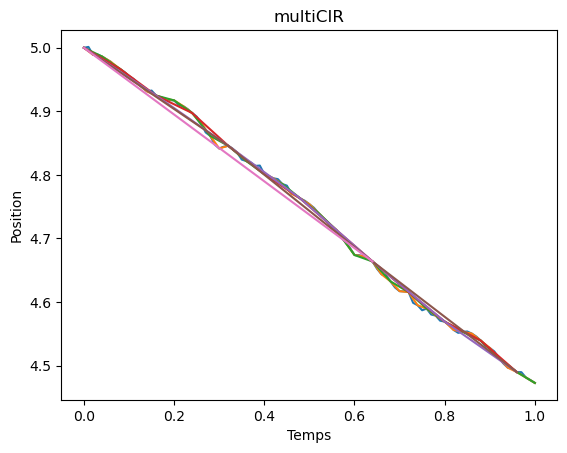

In [53]:
for i in range(10):
    plt.plot(multiCIR[i][0],multiCIR[i][1])
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('multiCIR')
plt.show()

In [ ]:
zap = CIR.CIR(alpha, b, sigma, T, k, S_0)
zap2 = CIR.CIR_ML(alpha, b, sigma, T, k, S_0,5)

In [ ]:
zap

In [ ]:
zap2

array([1000.        ,  990.46117392,  981.39982838,  971.68914217,
        962.85992471,  953.91998516,  944.74041551,  935.56966166,
        926.50960883,  917.71959879,  908.92410262,  900.20829462,
        891.47485445,  882.91834458,  875.56105974,  867.225721  ,
        859.17785251,  851.25730492,  843.06987932,  835.17311589,
        827.94049722])

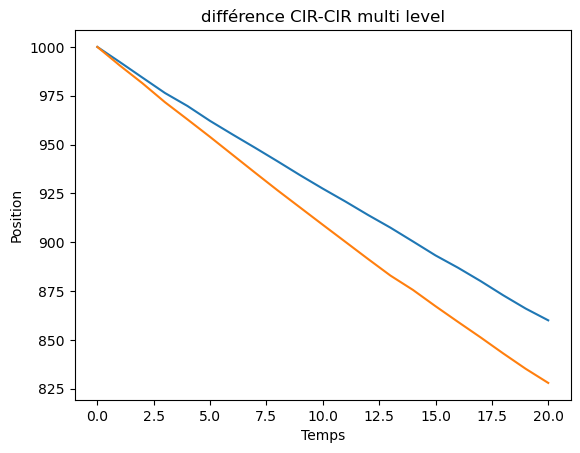

In [ ]:
plt.plot(zap)
plt.plot(zap2)
plt.xlabel('Temps')
plt.ylabel('Position')
plt.title('différence CIR-CIR multi level')
plt.show()

# Multi Level Monte Carlo

In [ ]:
import MLMC

In [ ]:
import CIR

In [ ]:
L = 10

In [ ]:
MLMC.level_mc_sim(nb_samples, S_0, T, r, sigma, K, alpha, b, L)

0.6795832819110003

In [ ]:
multiCIR_test = CIR.multiCIR_ML(alpha, b, sigma, L, T, S_0, nb_samples)

In [ ]:
MLMC.mc_telescopic_sum(alpha, b, sigma, L, T, S_0, nb_samples, r, K)

coucou


0.6469375713746368

In [ ]:
MLMC_test = MLMC.sim_MLMC(k, S_0, T, r, sigma, K, alpha, b)

Le ordinary tu fais n fois avec la même dicrétisation alors que le multi level tu fais n fois mais avec des discrétisations de plus en plus fines. Et en plus c'est "gratuit" car on utilise le même mouvement brownien.